In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [7]:
#  first we drop columns Unnamed

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Now we remove Gb from ram:

In [11]:
df['Ram']=df['Ram'].str.replace('GB',"",regex=False).str.strip()

In [12]:
# same remive kg from Weight

In [13]:
df['Weight']=df['Weight'].str.replace('kg','',regex=False).str.strip()

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
# change dataType: 

In [16]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

# df['Weight']=df['Weight'].astype('int32')
# df['Ram']=df['Ram'].astype('float32')

In [17]:
df['Weight']=df['Weight'].astype('int32')
df['Ram']=df['Ram'].astype('float32')

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   int32  
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\Tushar\AppData\Local\Temp\ipykernel_49268\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


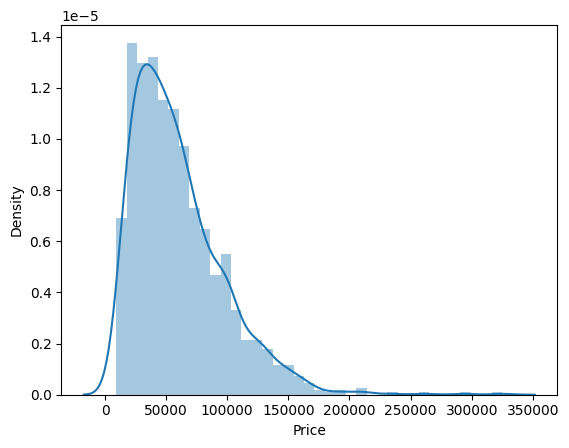

In [20]:
sns.distplot(df['Price'])
plt.show()

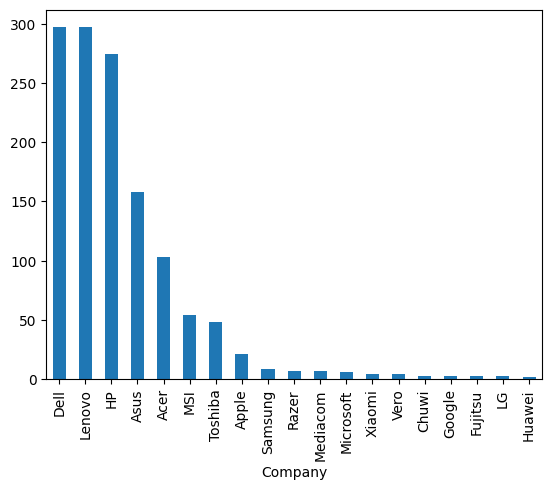

In [21]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

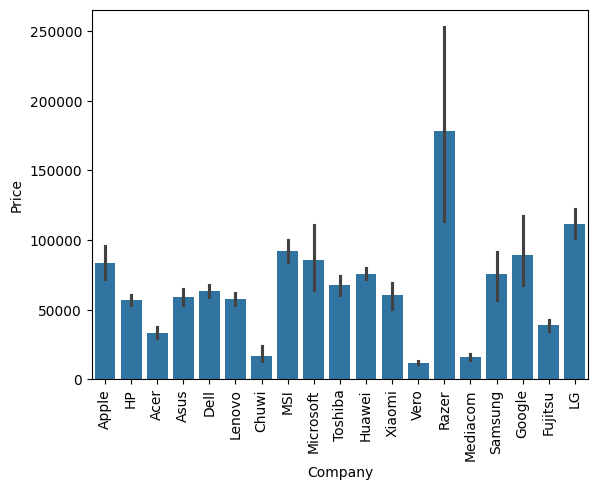

In [22]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

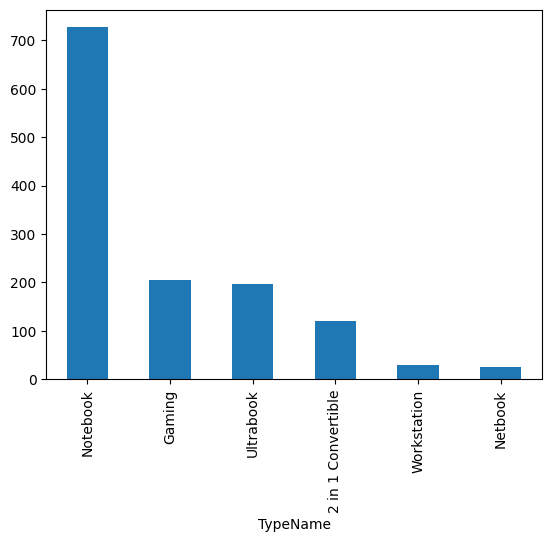

In [23]:
df['TypeName'].value_counts().plot(kind='bar')

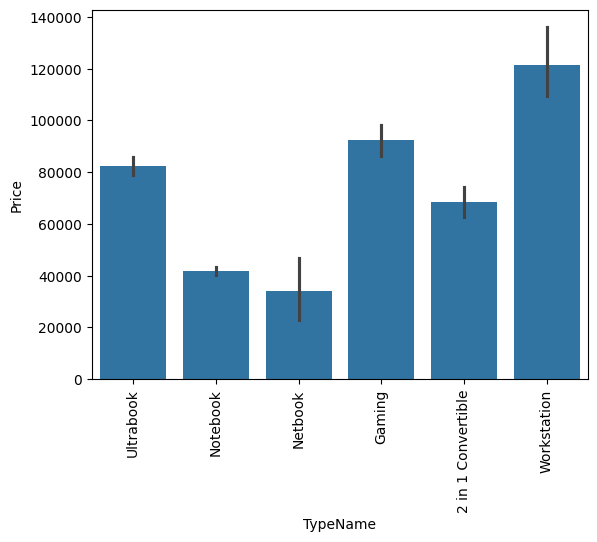

In [24]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

C:\Users\Tushar\AppData\Local\Temp\ipykernel_49268\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

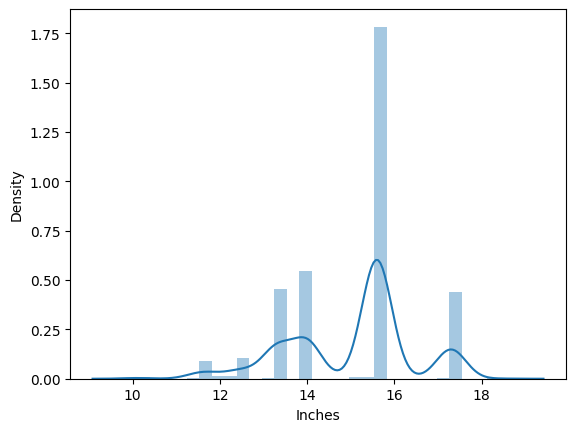

In [25]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

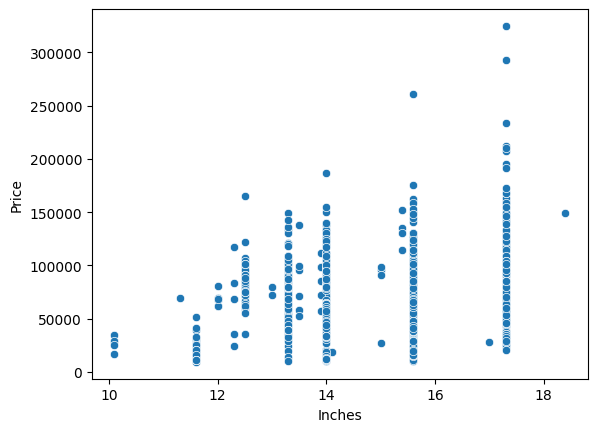

In [26]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [27]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [28]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080,0


<Axes: xlabel='Touchscreen'>

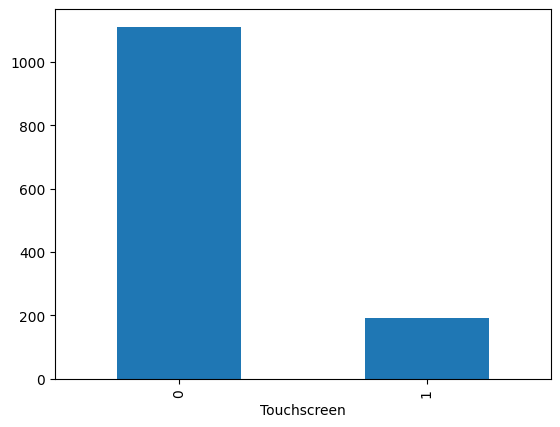

In [30]:
df['Touchscreen'].value_counts().plot(kind='bar')



<Axes: xlabel='Touchscreen', ylabel='Price'>

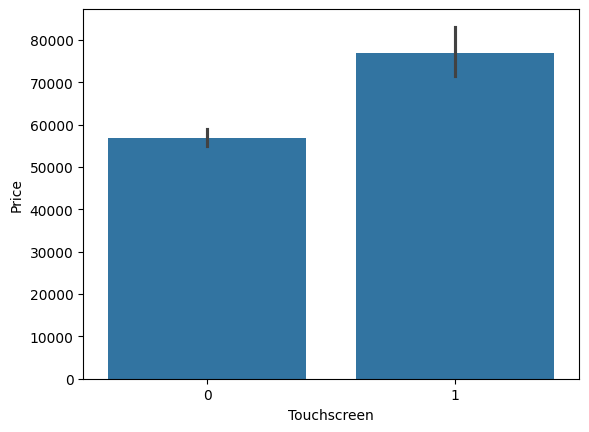

In [31]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [32]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080,0,1


<Axes: xlabel='Ips'>

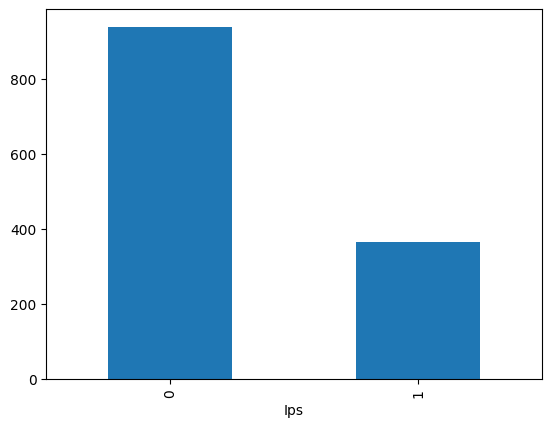

In [34]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

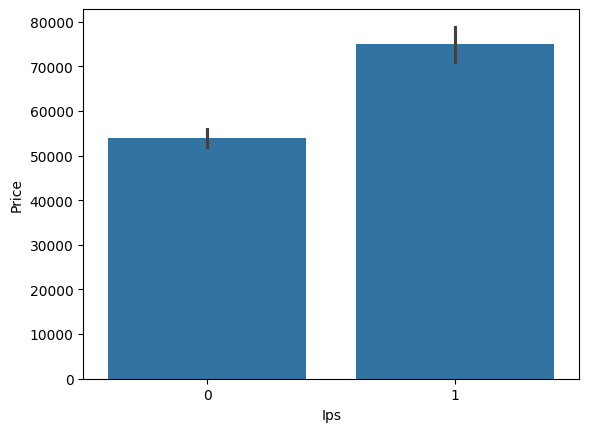

In [35]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [36]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [37]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [39]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d\.?\d)').apply(lambda x:x[0])

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,25,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,14,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0,0,19,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360,0,1,28,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080,0,1,25,1600


In [53]:
df['X_res']=df['X_res'].astype('int64')
df['Y_res']=df['Y_res'].astype('int64')
df['Weight']=df['Weight'].astype('float64')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(3), int64(4), object(7)
memory usage: 147.7+ KB


In [62]:
# sns.heatmap(df.corr()['Price'])
df.corr(numeric_only=True)['Price'] #correlation works only in integers columns thats why we use numeric_only=True


Inches         0.068197
Ram            0.743007
Weight         0.173722
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.558955
Y_res          0.552809
Name: Price, dtype: float64

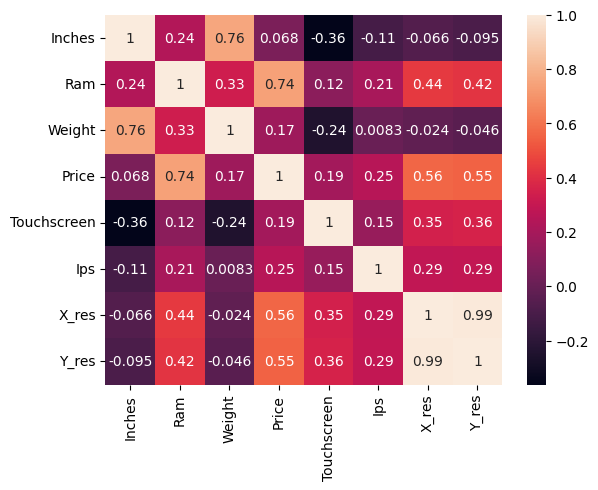

In [66]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [67]:
# new column : pixel per inch for better correlation

In [68]:
df['ppi']=(((df['X_res']**2)+ (df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [69]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.173722
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.558955
Y_res          0.552809
ppi            0.467229
Name: Price, dtype: float64

In [70]:
df.drop(columns='ScreenResolution',inplace=True)

In [71]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,25,1600,120.315436
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,14,900,67.677360
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,19,1080,69.241482
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,28,1800,116.897257
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,25,1600,120.315436


In [72]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [73]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436


In [76]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [80]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [81]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5


In [82]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [83]:
df['Cpu brand']= df['Cpu Name'].apply(fetch_processor)

In [84]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

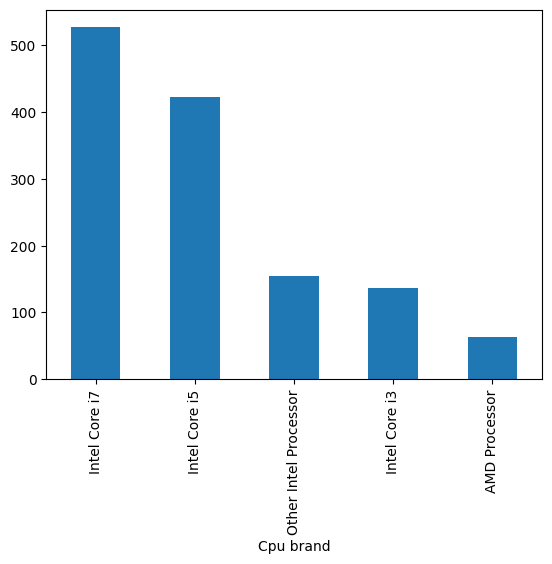

In [85]:
df['Cpu brand'].value_counts().plot(kind='bar')

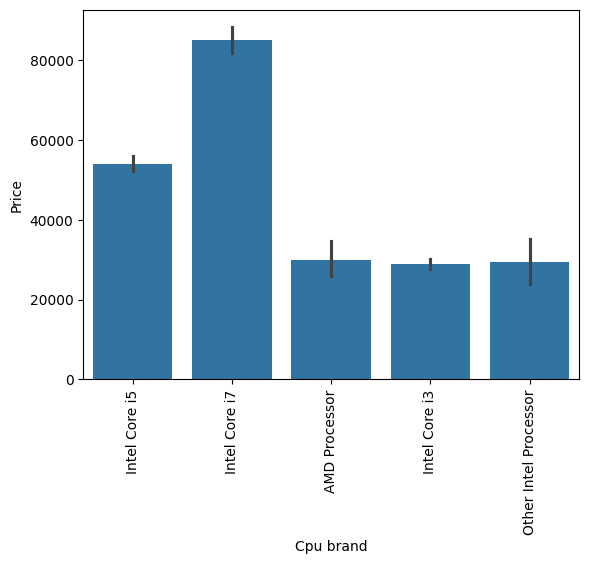

In [88]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [89]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [90]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5
2,HP,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5
3,Apple,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7
4,Apple,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5


<Axes: xlabel='Ram'>

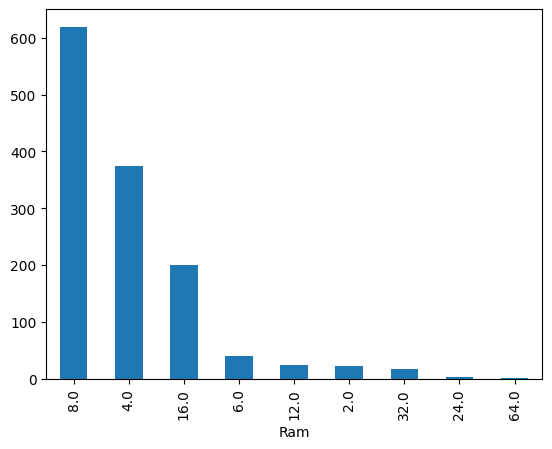

In [91]:
df['Ram'].value_counts().plot(kind='bar')

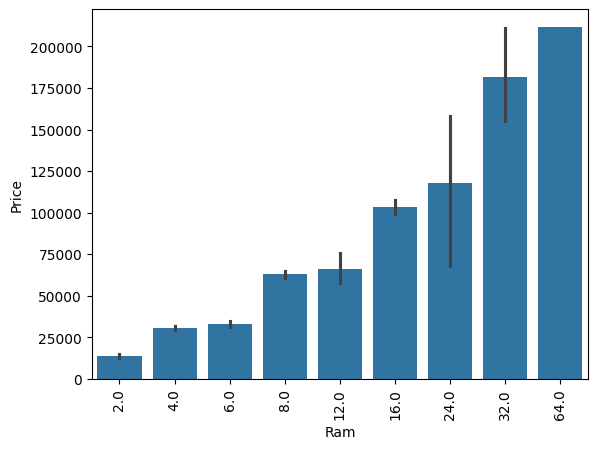

In [94]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [95]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [98]:
# df['Memory']=df['Memory'].astype(str).replace('\.0', '',regex=True)
# df['Memory']=df['Memory'].str.replace('GB', '')
# df['Memory']=df['Memory'].str.replace('TB', '000')
# new=df['Memory'].str.split('+',n=1,expand=True)

# df['first']=new[0]
# df['first']=df['first'].str.strip()

# df['second']=new[1]

# df['Layer1HDD']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
# df['Layer1SSD']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
# df['Layer1Hybrid']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
# df['Layer1Flash_Storage']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# df['first']=df['first'].str.replace(r'\D','')

# df['second'].fillna('0',inplace=True)

# df['Layer2HDD']=df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
# df['Layer2SSD']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
# df['Layer2Hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
# df['Layer2Flash_Storage']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# df['second']=df['second'].str.replace(r'\D','')

# df['first']=df['first'].astype(int)
# df['second']=df['second'].astype(int)

# df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
# df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
# df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
# df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

# df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)



# Convert Memory to string and clean
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=False)

# Split on '+'
new = df['Memory'].str.split('+', n=1, expand=True)

df['first'] = new[0].str.strip()
df['second'] = new[1]

# Fill NaN in second part
df['second'] = df['second'].fillna('0')

# Layer 1 storage type
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Layer 2 storage type
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Extract only numbers
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Safe convert to int
df['first'] = pd.to_numeric(df['first'], errors='coerce').fillna(0).astype(int)
df['second'] = pd.to_numeric(df['second'], errors='coerce').fillna(0).astype(int)

# Create final storage columns
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop extra columns
df.drop(
    columns=[
        'first', 'second',
        'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
        'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
    ],
    inplace=True
)


In [99]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5,0,0,0,128
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5,0,256,0,0


In [103]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.173722
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.467229
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [104]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [105]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5,0,128
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5,0,0
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5,0,256
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7,0,512
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5,0,256


In [106]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [107]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5,0,256,Intel


In [108]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [109]:
df=df[df['Gpu brand']!= 'ARM']

In [110]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

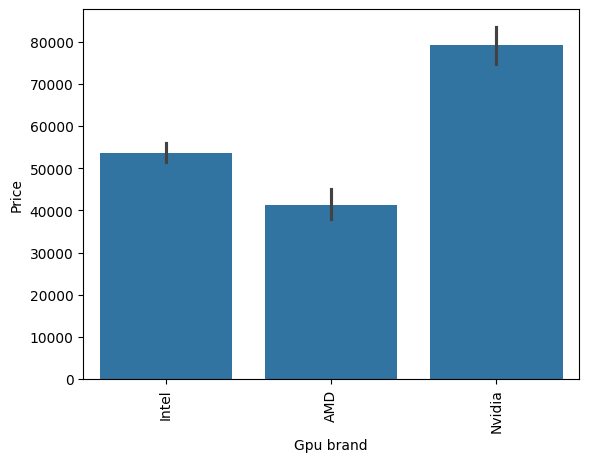

In [113]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [114]:
df.drop(columns='Gpu',inplace=True)

C:\Users\Tushar\AppData\Local\Temp\ipykernel_49268\4161999305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Gpu',inplace=True)


In [115]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8.0,128 SSD,macOS,1.0,71378.6832,0,1,120.315436,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,128 Flash Storage,macOS,1.0,47895.5232,0,0,67.677360,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,256 SSD,No OS,1.0,30636.0000,0,0,69.241482,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,512 SSD,macOS,1.0,135195.3360,0,1,116.897257,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,256 SSD,macOS,1.0,96095.8080,0,1,120.315436,Intel Core i5,0,256,Intel


In [116]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

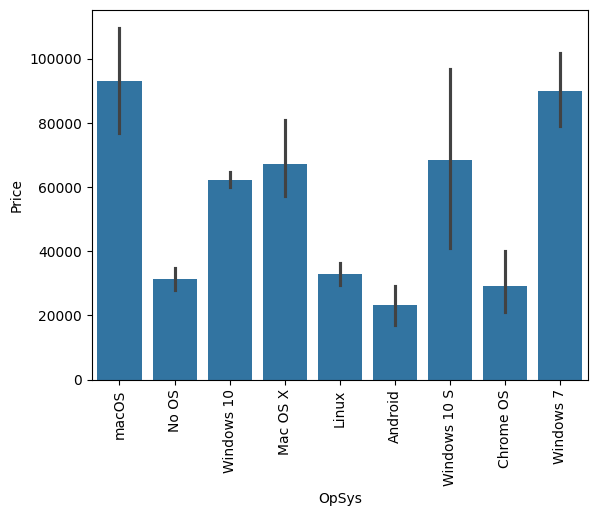

In [117]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [122]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/ Linux'


In [123]:
df['os'] = df['OpSys'].apply(cat_os)


In [125]:
df.drop(columns='OpSys',inplace=True)


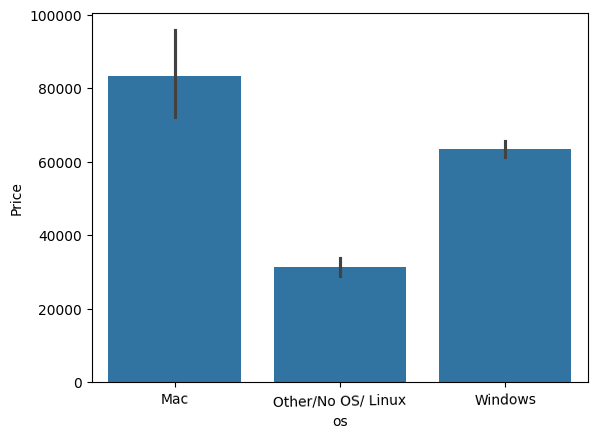

In [126]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=True)
plt.show()

C:\Users\Tushar\AppData\Local\Temp\ipykernel_49268\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

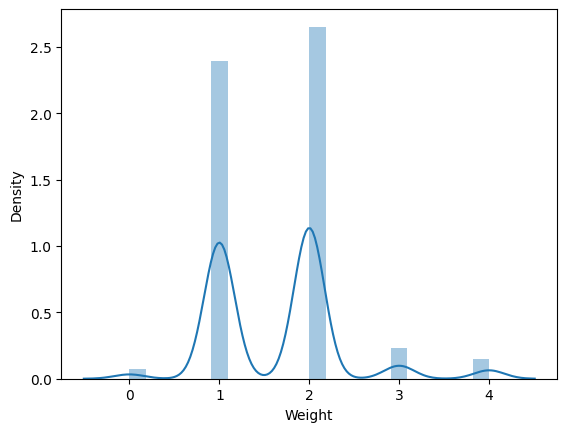

In [127]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

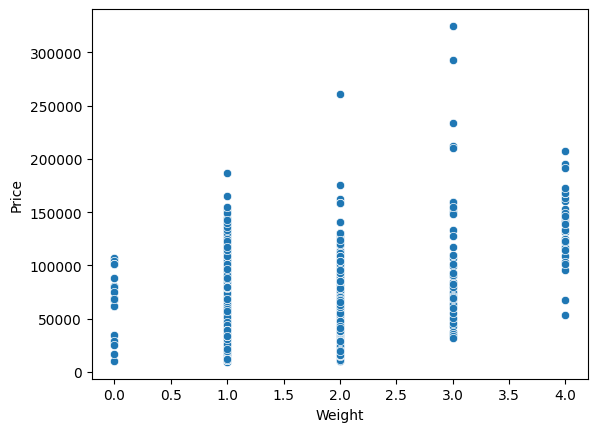

In [128]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [129]:
df.corr(numeric_only=True)['Price']

Ram            0.742905
Weight         0.173350
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.469962
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

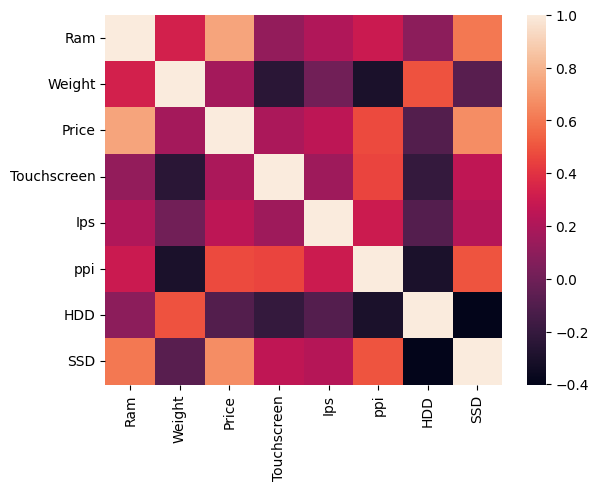

In [130]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

C:\Users\Tushar\AppData\Local\Temp\ipykernel_49268\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

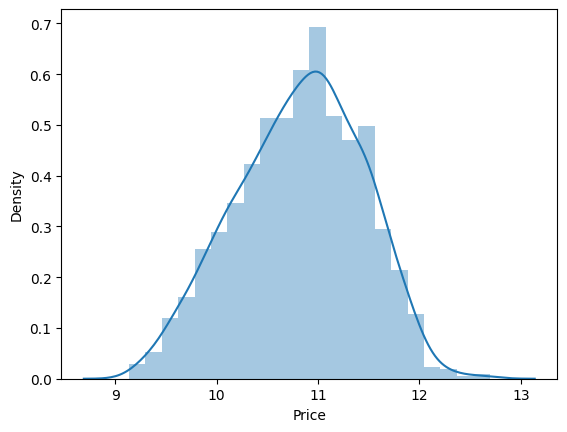

In [132]:
sns.distplot(np.log(df['Price']))

In [158]:
# Splitting: 

X=df.drop(columns=['Price'])
Y=np.log(df['Price'])

In [159]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [192]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor


In [163]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.807718735959339
MAE: 0.21053307715857222


In [165]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,1.0,71378.6832,0,1,120.315436,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8.0,1.0,47895.5232,0,0,67.677360,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8.0,1.0,30636.0000,0,0,69.241482,Intel Core i5,0,256,Intel,Other/No OS/ Linux
3,Apple,Ultrabook,16.0,1.0,135195.3360,0,1,116.897257,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8.0,1.0,96095.8080,0,1,120.315436,Intel Core i5,0,256,Intel,Mac


In [166]:
# df.drop(columns='Memory',inplace=True)

# Ridge Regression

In [167]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8146405056667212
MAE: 0.20806557641826703


# Lasso Regression

In [174]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8090003267355163
MAE: 0.2099158595276798


# KNN

In [180]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8065179592382494
MAE: 0.1927797645023226


# Decision Tree

In [181]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8117821334569711
MAE: 0.20345050666460093


# SVM

In [183]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8189795046725838
MAE: 0.20106909921115063


# Random Forest

In [185]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8778222697044193
MAE: 0.1678939628930101


# Extra Tress

In [187]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15,
                           bootstrap=True)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8728334028338339
MAE: 0.16945873259306568


# AdaBoost

In [188]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.7936010495263822
MAE: 0.2319844321626314


# Gradient Boost

In [189]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.8809774657763622
MAE: 0.16347687559605034


# XG Boost

In [190]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,mac_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

R2 score: 0.878226839920948
MAE: 0.16141349202263958


C:\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "mac_depth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Voting Regressor

In [193]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=500)
xgb=XGBRegressor(n_estimators=45,mac_depth=5,learning_rate=0.5)
# lr=LinearRegression()
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)


step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))

C:\New folder\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:09:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "mac_depth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


R2 score: 0.885256221832234
MAE: 0.16222001381522108


# Stacking

In [197]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )),

    ('gbdt', GradientBoostingRegressor(
        n_estimators=500,
        random_state=3
    )),

    ('xgb', XGBRegressor(
        n_estimators=45,
        max_depth=5,          # fixed
        learning_rate=0.5,
        random_state=3
    ))
]


step2 = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100)
)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(X_train, Y_train)


y_pred = pipe.predict(X_test)


print('R2 score:', r2_score(Y_test, y_pred))
print('MAE:', mean_absolute_error(Y_test, y_pred))


R2 score: 0.8836623231401683
MAE: 0.1651229973876164


In [198]:
import pickle

In [199]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))